In [4]:

#imports
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


img = cv.imread('./Assets/test1.png')

img = cv.GaussianBlur(img,(5,5),0)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
mask = np.zeros((gray.shape),np.uint8)
kernel1 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(11,11))

close = cv.morphologyEx(gray,cv.MORPH_CLOSE,kernel1)
div = np.float32(gray)/(close)
res = np.uint8(cv.normalize(div,div,0,255,cv.NORM_MINMAX))
res2 = cv.cvtColor(res,cv.COLOR_GRAY2BGR)

In [5]:
# masking

thresh = cv.adaptiveThreshold(res, 255, 0, 1, 19, 2)
contour, hier = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

max_area = 0
best_cnt = None
for cnt in contour:
    area = cv.contourArea(cnt)
    if area > 1000:
        if area > max_area:
            max_area = area
            best_cnt = cnt

cv.drawContours(mask, [best_cnt], 0, 255, -1)
cv.drawContours(mask, [best_cnt], 0, 0, 2)

res = cv.bitwise_and(res, mask)


In [6]:
def getMaxContour(contour):
    maxHeight = 1000
    maxPair=[0,0]
    for index, cnt in enumerate(contour,0):
        x, y, w, h = cv.boundingRect(cnt)
        # print(y)
        if(y < maxHeight):
            maxHeight = y
            maxPair=cnt[0]
    return maxPair
    

In [7]:
def keepMaxLine(pair, contour):
        for cnt in contour:
                x, y, w, h = cv.boundingRect(cnt)
                print(x,y)
                if (y > pair[1] and  x!= pair[0]):
                            cnt[0][0] = 0
                            cnt[0][1] = 0

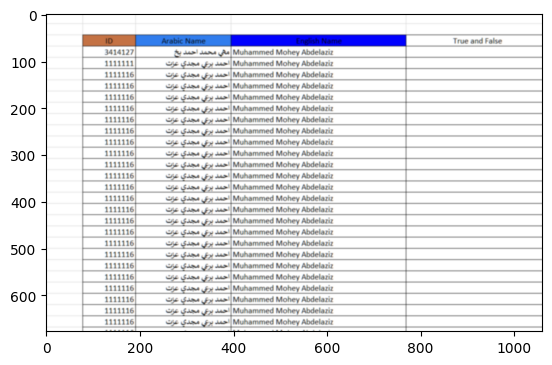

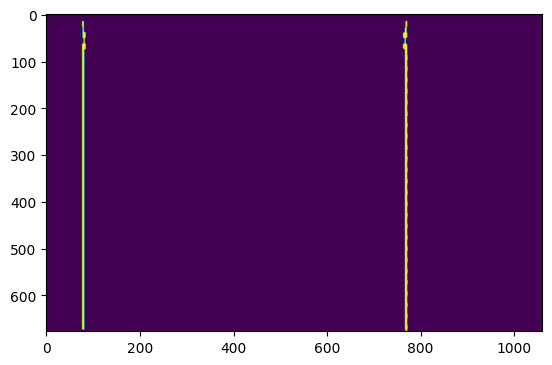

In [8]:
# vertical lines

kernelx = cv.getStructuringElement(cv.MORPH_RECT, (2, 10))
dx = cv.Sobel(res, cv.CV_16S, 1, 0)
dx = cv.convertScaleAbs(dx)
cv.normalize(dx, dx, 0, 255, cv.NORM_MINMAX)
ret, close = cv.threshold(dx, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
close = cv.morphologyEx(close, cv.MORPH_DILATE, kernelx, iterations=1)

contour, hier = cv.findContours(
    close, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for cnt in contour:
    x, y, w, h = cv.boundingRect(cnt)
    # maxPair=getMaxContour(cnt)
    # keepMaxLine(maxPair,cnt)
    # print(cnt)
    
    cv.drawContours(close, [cnt], 0, 255, -1)
    if h/w > 10 :
        cv.drawContours(close, [cnt], 0, 255, -1)
    else:
        cv.drawContours(close, [cnt], 0, 0, -1)
close = cv.morphologyEx(close, cv.MORPH_CLOSE, None, iterations=2)


closex = close.copy()
contour, hier = cv.findContours(
    close, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

plt.imshow(img)
plt.show()
plt.imshow(close)
plt.show()


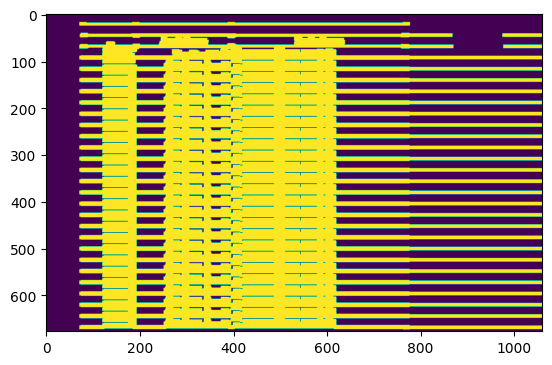

In [9]:
# horizontal

kernely = cv.getStructuringElement(cv.MORPH_RECT,(10,2))
dy = cv.Sobel(res,cv.CV_16S,0,2)
dy = cv.convertScaleAbs(dy)
cv.normalize(dy,dy,0,255,cv.NORM_MINMAX)
ret,close = cv.threshold(dy,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
close = cv.morphologyEx(close,cv.MORPH_DILATE,kernely)

contour, hier = cv.findContours(close,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

for cnt in contour:
    x,y,w,h = cv.boundingRect(cnt)
    if w/h > 10:
        cv.drawContours(close,[cnt],0,255,-1)
    else:
        cv.drawContours(close,[cnt],0,0,-1)

close = cv.morphologyEx(close,cv.MORPH_DILATE,None,iterations = 2)
closey = close.copy()

plt.imshow(close)
plt.show()

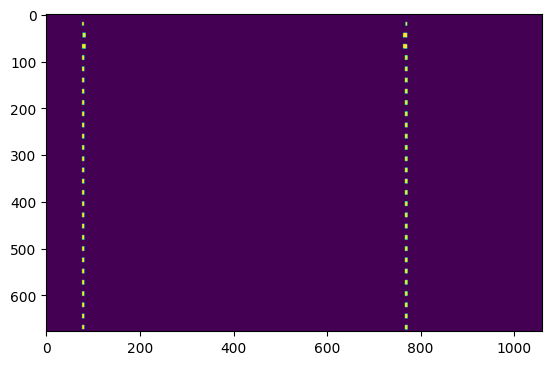

In [10]:
# result
res = cv.bitwise_and(closex,closey)
plt.imshow(res)
plt.show()